# Support Vector Machines

## Load data

In [202]:
import pandas as pd

df = pd.read_csv('data/heart.csv')

## Data analysis

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [204]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


## Model Training

In [205]:
from sklearn.model_selection import train_test_split

y = df['target']
X = df.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [206]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.svm import LinearSVC


table = pd.DataFrame(columns=['Initial', 'StandardScaler', 'MinMaxScaler', 'MaxAbsScaler'], index=['dual=False', 'dual=True'])
scalers = [None, StandardScaler(), MinMaxScaler(), MaxAbsScaler()]

# Define the dual parameter values
# From documentation: "Select the algorithm to either solve the dual or primal optimization problem. Prefer dual=False when n_samples > n_features."
# It also helps to avoid ConvergenceWarning
dual_params = [False, True]

for dual in dual_params:
    scores = {}

    for scaler in scalers:
        X_train_scaled = scaler.fit_transform(X_train) if scaler is not None else X_train
        X_test_scaled = scaler.transform(X_test) if scaler is not None else X_test
        col = scaler.__class__.__name__ if scaler is not None else 'Initial'

        clf = LinearSVC(random_state=42, dual=dual)
        clf.fit(X_train_scaled, y_train)

        scores[col] = clf.score(X_test_scaled, y_test)

    table.loc[f'dual={dual}'] = pd.Series(scores)

print(table)


             Initial StandardScaler MinMaxScaler MaxAbsScaler
dual=False  0.851541       0.851541     0.851541     0.851541
dual=True    0.70028       0.851541     0.851541     0.851541


/home/vornic/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vornic/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Conclusion

From the results, it seems that all the chosen scalers produced the same score as the initial data when dual=False, indicating that scaling the data had no effect on the performance of the model. It is possible that the data was already scaled, or that it was already in a form that was suitable for the model.

However, when dual=True, the results were a bit different. The choice of dual parameter of the SVM model seems to have a significant effect only on the initial data.

## SVM Kernels

### Feature Selection

In [207]:
df.corr()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
age,1.000000,0.015096,0.149055,0.257692,-0.046472,0.178923,0.194595,-0.368676,0.188095,0.245093,0.237749,0.262029
sex,0.015096,1.000000,0.138405,-0.006443,-0.208441,0.110961,-0.022225,-0.181837,0.194380,0.096390,0.127913,0.311267
chest pain type,0.149055,0.138405,1.000000,0.009466,-0.109396,0.076492,0.035705,-0.337491,0.403428,0.224106,0.276949,0.460127
resting bp s,0.257692,-0.006443,0.009466,1.000000,0.099037,0.088235,0.095860,-0.101357,0.142435,0.176111,0.089384,0.121415
cholesterol,-0.046472,-0.208441,-0.109396,0.099037,1.000000,-0.239778,0.150879,0.238028,-0.033261,0.057451,-0.100053,-0.198366
fasting blood sugar,0.178923,0.110961,0.076492,0.088235,-0.239778,1.000000,0.032124,-0.118689,0.053053,0.031193,0.145902,0.216695
resting ecg,0.194595,-0.022225,0.035705,0.095860,0.150879,0.032124,1.000000,0.058812,0.037821,0.126023,0.093629,0.073059
max heart rate,-0.368676,-0.181837,-0.337491,-0.101357,0.238028,-0.118689,0.058812,1.000000,-0.377691,-0.183688,-0.350750,-0.413278
exercise angina,0.188095,0.194380,0.403428,0.142435,-0.033261,0.053053,0.037821,-0.377691,1.000000,0.370772,0.393408,0.481467
oldpeak,0.245093,0.096390,0.224106,0.176111,0.057451,0.031193,0.126023,-0.183688,0.370772,1.000000,0.524639,0.398385


In [208]:
X.corrwith(y).abs().sort_values(ascending=False)

ST slope               0.505608
exercise angina        0.481467
chest pain type        0.460127
max heart rate         0.413278
oldpeak                0.398385
sex                    0.311267
age                    0.262029
fasting blood sugar    0.216695
cholesterol            0.198366
resting bp s           0.121415
resting ecg            0.073059
dtype: float64

In [209]:
features = ['ST slope', 'exercise angina']
X = df[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Decision Boundaries

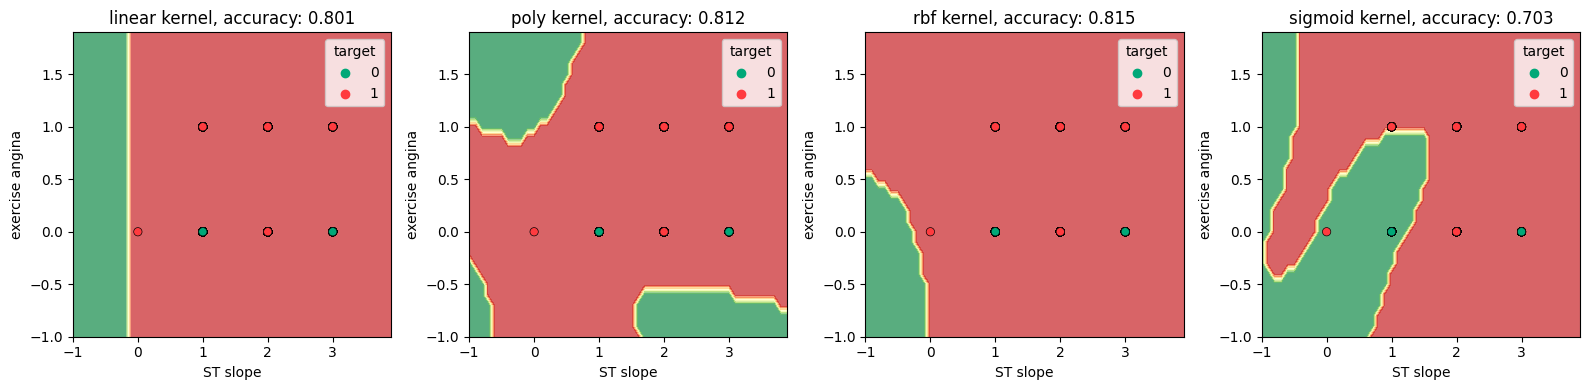

In [210]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

kernels = ['linear', 'poly',  'rbf', 'sigmoid']

std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

min1, max1 = X['ST slope'].min() - 1, X['ST slope'].max() + 1
min2, max2 = X['exercise angina'].min() - 1, X['exercise angina'].max() + 1

x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
xx, yy = np.meshgrid(x1grid, x2grid)

r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1, r2))

fig, ax = plt.subplots(1, 4, figsize=(16, 4))
sns.set_palette(['#00A878', '#FF3B3F'])

for i, kernel in enumerate(kernels):
    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(grid)
    zz = y_pred.reshape(xx.shape)
    score = model.score(X_test_scaled, y_test)

    ax[i].contourf(xx, yy, zz, cmap='RdYlGn_r', alpha=0.7)
    ax[i].set_title(f'{kernel} kernel, accuracy: {score:.3f}')
    sns.scatterplot(x='ST slope', y='exercise angina', hue=y, data=df, edgecolor='k', ax=ax[i])

plt.tight_layout()
plt.show()

### Conclusion

For the Heart Disease Dataset, the _rbf_ kernel produces the best decision boundary for the most important features, with the _poly_ kernel producing a close second, as it has an accuracy of 0.812. The _sigmoid_ kernel was the least effective, with a score of 0.703.